<a href="https://colab.research.google.com/github/viniVN7/data-mining-rotatividade-de-clientes/blob/main/Projeto_Mineracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO - MINERAÇÃO DE DADOS - 2022.2 💻🔍📊**

---



**Discente: José Vinícius de Carvalho Oliveira**

# **Sobre a base de dados escolhida**

A base de dados escolhida refere-se a um conjunto de dados de um determinado banco.
O objetivo desta base de dados é verificar se o cliente é churn ou não churn. O termo "churn" refere-se à taxa de rotatividade de clientes, ou seja, se um cliente cancela ou encerra seu relacionamento com o banco. A variável alvo "churn" indica se o cliente deixou de utilizar os serviços do banco (1) ou permaneceu como cliente ativo (0).

A base de dados apresenta as seguintes colunas:

*   **customer_id** - O identificador exclusivo para um cliente específico
*   **credit_score** - Uma medida de credibilidade, quão confiável é o credor do cliente.
*   **country** - País de residência do cliente.
*   **sexo** - Sexo do cliente.
*   **age** - Idade do cliente.
*   **tenure** - Período de tempo que o cliente mantém uma conta no banco.
*   **saldo** - Valor em dinheiro presente na conta do cliente.
*   **products_number** - O número de produtos distintos que o cliente possui no banco (tanto conta corrente, isa, etc.)
*   **credit_card** - O cliente possui um cartão de crédito com o banco? (1/0)
*   **active_member** - O cliente está usando ativamente os serviços do banco?
*   **estimado_salário** - Receita total estimada do cliente.
*   **churn** - O cliente churn? (1/0) - Label/Classe

[Link da base de dados utilizada](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)

# **Bibliotecas utilizadas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

# **Base de dados**

In [ ]:
url = 'https://raw.githubusercontent.com/viniVN7/Mineracao-De-Dados/main/Projeto/Bank%20Customer%20Churn%20Prediction.csv'
df = pd.read_csv(url, sep=',', encoding = 'latin1')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# verificando se existe alguma coluna que apresente linhas nulas
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
#verificando se há valores repetidos
df.loc[df['customer_id'] == df['customer_id'].duplicated()]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
df.drop('customer_id', 1, inplace=True)

<ipython-input-6-ba7c2a8a0383>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('customer_id', 1, inplace=True)


# **Quantidade de linhas e colunas**

In [ ]:
print(df.shape)
print(df.info())

(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None




---



# **Matriz de correlação**

A matriz de correlação é uma ferramenta que permite avaliar a relação entre variáveis em um conjunto de dados, ajudando a identificar associações e padrões que podem ser úteis na mineração de dados e análise de dados.

A mesma exibe os coeficientes de correlação entre pares de variáveis. O coeficiente de correlação é uma medida estatística que indica a força e a direção da relação linear entre duas variáveis. O coeficiente de correlação varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação.

Ao analisar uma matriz de correlação, é possível identificar quais variáveis estão positivamente correlacionadas, o que significa que elas tendem a variar juntas na mesma direção, e quais estão negativamente correlacionadas, indicando que elas tendem a variar em direções opostas.

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<ipython-input-8-2dc7d9779715>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7.5}, cmap='Blues', square=True)


<Axes: >

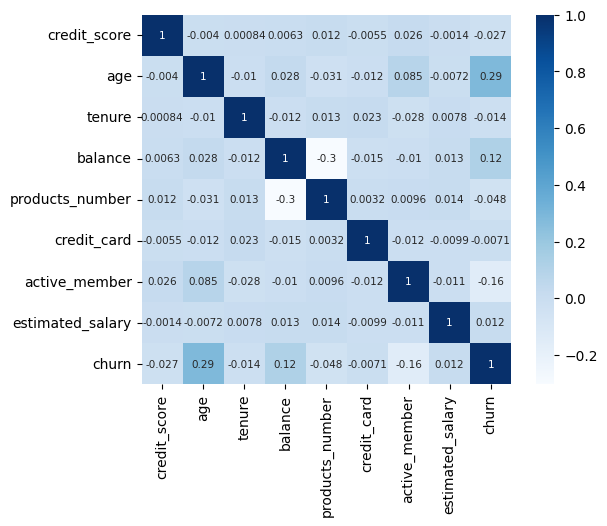

In [ ]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7.5}, cmap='Blues', square=True)

# **Outliers**

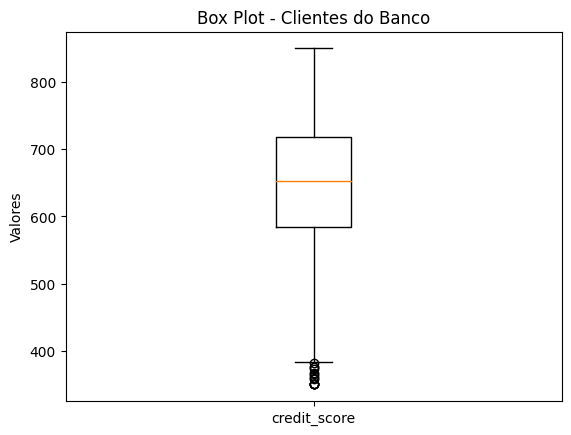

In [ ]:
# Selecionar as colunas relevantes do DataFrame (exemplo)
colunas_interesse = ['credit_score']
#'balance', 'estimated_salary', 'age'

# Filtrar o DataFrame para incluir apenas as colunas de interesse
df_interesse = df[colunas_interesse]

# Plotar o box plot das colunas
plt.boxplot(df_interesse.values, labels=df_interesse.columns)

# Configurações do gráfico
plt.title('Box Plot - Clientes do Banco')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()


<Axes: >

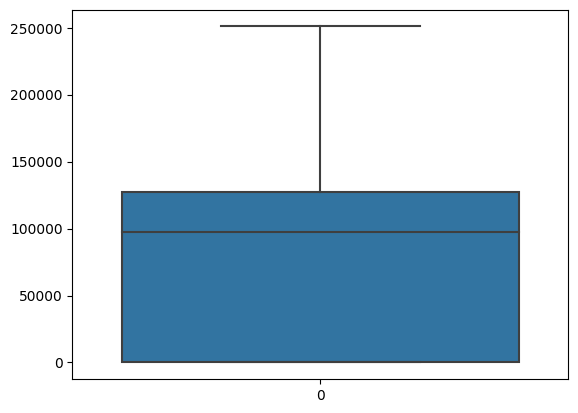

In [ ]:
colunas_interesse = ['balance']
#'balance', 'estimated_salary', 'age'

df_interesse = df[colunas_interesse]

# Plotar o box plot das colunas
sns.boxplot(df['balance'])


<Axes: >

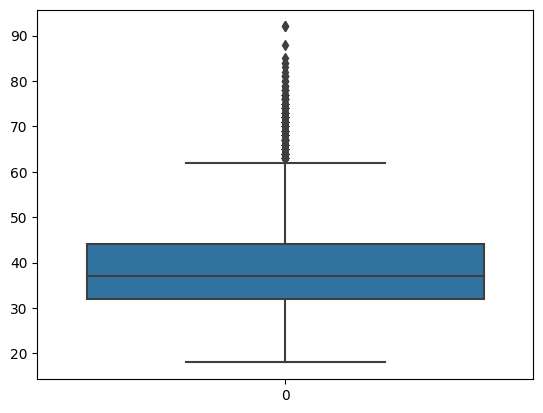

In [ ]:
colunas_interesse = ['age']
#'balance', 'estimated_salary', 'age'

# Filtrar o DataFrame para incluir apenas as colunas de interesse
df_interesse = df[colunas_interesse]

# Plotar o box plot das colunas
sns.boxplot(df['age'])

<Axes: >

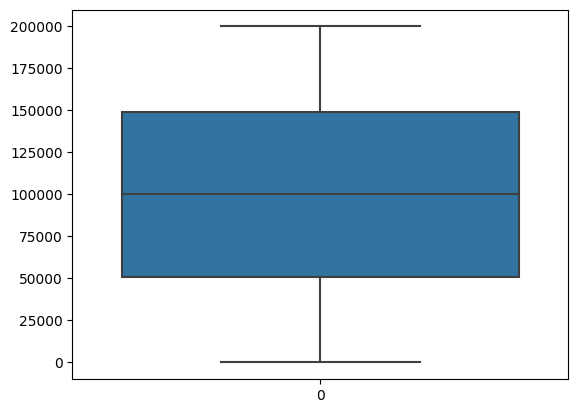

In [ ]:
colunas_interesse = ['estimated_salary']
#'balance', 'estimated_salary', 'age'

# Filtrar o DataFrame para incluir apenas as colunas de interesse
df_interesse = df[colunas_interesse]

# Plotar o box plot das colunas
sns.boxplot(df['estimated_salary'])

<Axes: >

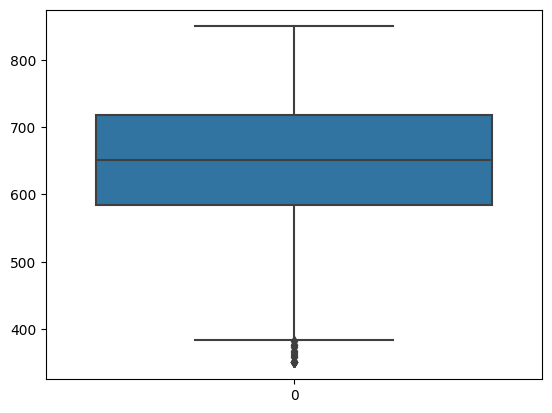

In [ ]:
colunas_interesse = ['credit_score']
#'balance', 'estimated_salary', 'age'

# Filtrar o DataFrame para incluir apenas as colunas de interesse
df_interesse = df[colunas_interesse]

# Plotar o box plot das colunas
sns.boxplot(df['credit_score'])

# **Funções**

In [ ]:
def gerarGrafico(labels, values, title):
    colors = ['#1f77b4', '#aec7e8']

    # Criar o gráfico de pizza
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

    # Ajustar o aspect ratio para que o gráfico de pizza fique circular
    plt.axis('equal')

    # Adicionar um título
    plt.title(title)

    # Exibir o gráfico
    plt.show()




---




# **RELATÓRIOS DESCRITIVOS**

---



## **Estatísticas descritivas gerais**

In [ ]:
df.describe()

#count: número de valores não nulos
#mean: média dos valores
#std: desvio padrão dos valores
#min: valor mínimo
#25%: primeiro quartil (25%)
#50%: segundo quartil ou mediana (50%)
#75%: terceiro quartil (75%)
#max: valor máximo

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Country**

**Quantidade de clientes por país**

In [ ]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

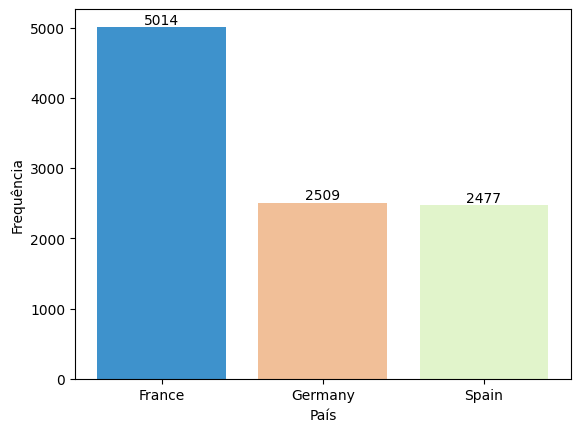

In [ ]:
# Contar a frequência de cada valor na coluna 'country'
country_counts = df['country'].value_counts()

# Definir as cores para cada coluna
colors = ['#3E92CC', '#F1BF98', '#E1F4CB']

# Criar o gráfico de colunas
plt.bar(country_counts.index, country_counts.values, color=colors)

# Adicionar rótulos aos eixos
plt.xlabel('País')
plt.ylabel('Frequência')

# Adicionar o número exato de clientes em cada barra
for i, count in enumerate(country_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Mostrar o gráfico
plt.show()


**Quantidade de clientes churn por país**

In [ ]:
contagem_churn_por_pais = df[df['churn'] == 1].groupby('country').size()
print(contagem_churn_por_pais)

country
France     810
Germany    814
Spain      413
dtype: int64


In [ ]:
#Qual a porcentagem que esses valores representam em relação ao total de clientes de cada país

contagem_churn_por_pais = df[df['churn'] == 1].groupby('country').size()

total_clientes_por_pais = df['country'].value_counts()

porcentagem_churn_por_pais = (contagem_churn_por_pais / total_clientes_por_pais) * 100

print(round(porcentagem_churn_por_pais,2))


country
France     16.15
Germany    32.44
Spain      16.67
dtype: float64


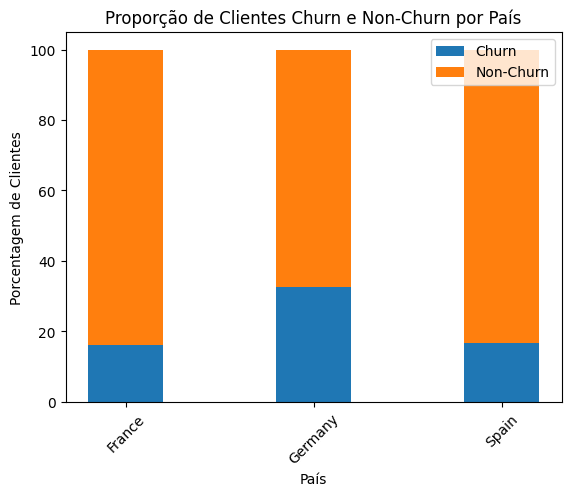

In [ ]:
# Filtrar os dados do DataFrame para clientes churn e não churn
churn_data = df[df['churn'] == 1]
non_churn_data = df[df['churn'] == 0]

# Contagem de clientes churn e não churn por país
churn_counts = churn_data['country'].value_counts()
non_churn_counts = non_churn_data['country'].value_counts()

# Calcular as porcentagens de churn e não churn por país
churn_percentages = (churn_counts / df['country'].value_counts()) * 100
non_churn_percentages = (non_churn_counts / df['country'].value_counts()) * 100

# Configurar a posição das barras no gráfico
x = range(len(churn_percentages))

# Plotar as barras para as porcentagens de churn e não churn
plt.bar(x, churn_percentages, width=0.4, label='Churn')
plt.bar(x, non_churn_percentages, width=0.4, label='Non-Churn', bottom=churn_percentages)

# Configurações do gráfico
plt.xlabel('País')
plt.ylabel('Porcentagem de Clientes')
plt.title('Proporção de Clientes Churn e Non-Churn por País')
plt.xticks(x, churn_percentages.index, rotation=45)
plt.legend()

# Exibir o gráfico
plt.show()


**média de pontuação de crédito por país**

In [ ]:
# Agrupar os dados por país e calcular a média do credit_score
media_credit_score_por_pais = df.groupby('country')['credit_score'].mean()

# Criar um novo DataFrame com os resultados
relatorio = pd.DataFrame({'País': media_credit_score_por_pais.index, 'Média de Credit Score': media_credit_score_por_pais.values})

# Exibir o relatório
print(relatorio)


      País  Média de Credit Score
0   France             649.668329
1  Germany             651.453567
2    Spain             651.333872


**média de saldo por país**

In [ ]:
# Agrupar os dados por país e calcular a média do balance
media_credit_score_por_pais = df.groupby('country')['balance'].mean()

# Criar um novo DataFrame com os resultados
relatorio = pd.DataFrame({'País': media_credit_score_por_pais.index, 'Média de Saldo': media_credit_score_por_pais.values})

# Exibir o relatório
print(relatorio)

      País  Média de Saldo
0   France    62092.636516
1  Germany   119730.116134
2    Spain    61818.147763


**média de salário estimado por país**

In [ ]:
# Agrupar os dados por país e calcular a média do estimated_salary
media_credit_score_por_pais = df.groupby('country')['estimated_salary'].mean()

# Criar um novo DataFrame com os resultados
relatorio = pd.DataFrame({'País': media_credit_score_por_pais.index, 'Média de Salário estimado': media_credit_score_por_pais.values})

# Exibir o relatório
print(relatorio)


      País  Média de Salário estimado
0   France               99899.180814
1  Germany              101113.435102
2    Spain               99440.572281


**Quantidade de clientes ativos por país**

In [ ]:
#Quantidade de clientes que utilizam ativamente sua conta por país
contagem_churn_por_pais = df[df['active_member'] == 1].groupby('country').size()
print(contagem_churn_por_pais)

country
France     2591
Germany    1248
Spain      1312
dtype: int64


## **Age**

In [ ]:
round(df['age'].describe(),2)

count    10000.00
mean        38.92
std         10.49
min         18.00
25%         32.00
50%         37.00
75%         44.00
max         92.00
Name: age, dtype: float64

In [ ]:
df['age'].min()

18

In [ ]:
df['age'].max()

92

In [ ]:
df['age'].mean()

38.9218

In [ ]:
df['age'].median()

37.0

In [ ]:
idade_mais_frequente = df['age'].value_counts().idxmax()
print("A idade mais frequente na base de dados é:", idade_mais_frequente)

A idade mais frequente na base de dados é: 37


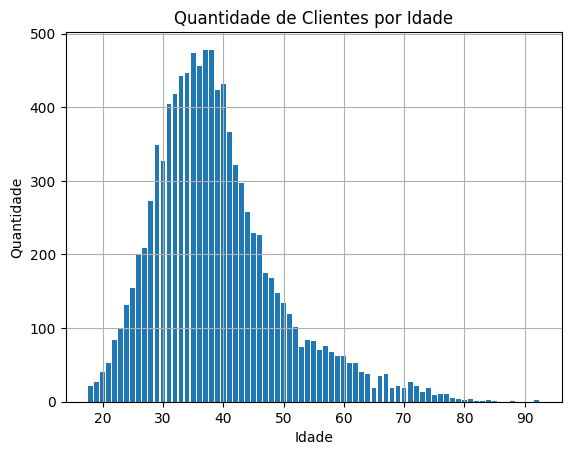

In [ ]:
# Filtrar os dados do DataFrame e fazer a contagem agrupada por idade
contagem_idades = df.groupby('age').size()

idades = contagem_idades.index
quantidades = contagem_idades.values

# Plotagem do gráfico de barras
plt.bar(idades, quantidades)

# Configurações do gráfico
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Quantidade de Clientes por Idade')
plt.grid(True)

# Exibição do gráfico
plt.show()


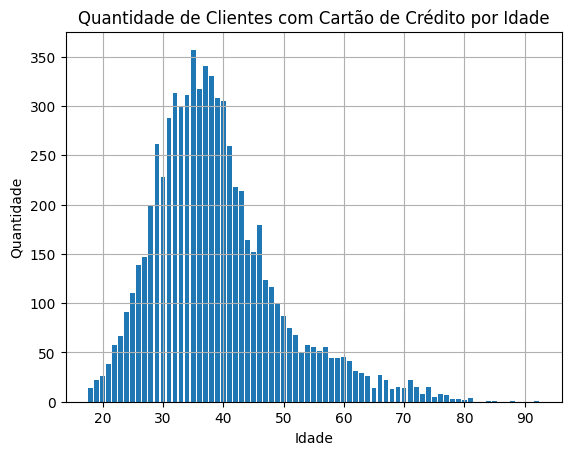

In [ ]:
contagem_idades = df[df['credit_card'] == 1].groupby('age').size()

idades = contagem_idades.index
quantidades = contagem_idades.values

# Plotagem do gráfico de barras
plt.bar(idades, quantidades)

# Configurações do gráfico
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Quantidade de Clientes com Cartão de Crédito por Idade')
plt.grid(True)

# Exibição do gráfico
plt.show()


## **Credit Card**

In [ ]:
#total de clientes que possuem cartão de crédito
df[df['credit_card'] == 1].shape[0]

7055

In [ ]:
#Quantidade de clientes que possuem cartão de crédito por país
df[df['credit_card'] == 1].groupby('country').size()

country
France     3543
Germany    1791
Spain      1721
dtype: int64

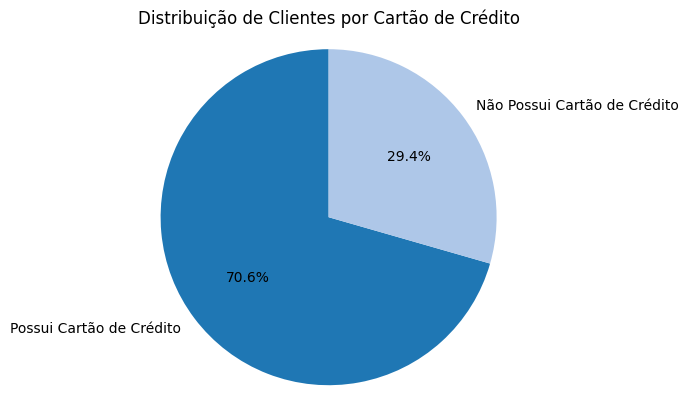

In [ ]:
labels = ['Possui Cartão de Crédito', 'Não Possui Cartão de Crédito']
values = df['credit_card'].value_counts().values
title = 'Distribuição de Clientes por Cartão de Crédito'

gerarGrafico(labels, values, title)

## **Credit Score**

In [ ]:
round(df['credit_score'].describe(),2)

count    10000.00
mean       650.53
std         96.65
min        350.00
25%        584.00
50%        652.00
75%        718.00
max        850.00
Name: credit_score, dtype: float64

In [ ]:
df['credit_score'].min()

350

In [ ]:
df['credit_score'].max()

850

In [ ]:
df['credit_score'].median()

652.0

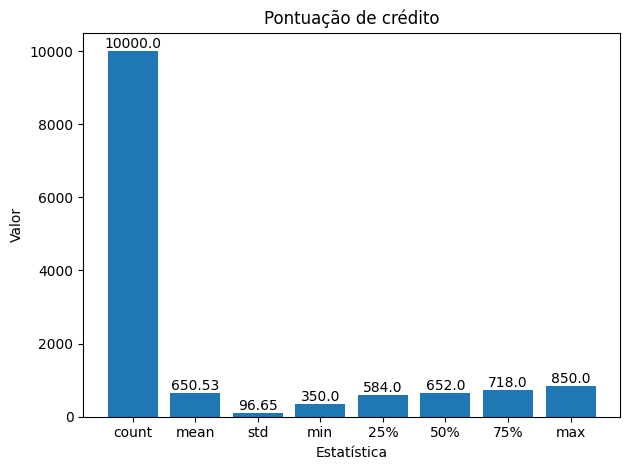

In [ ]:
descricao_saldo = round(df['credit_score'].describe(), 2)

# Preparação dos dados para o gráfico
indices = descricao_saldo.index
valores = descricao_saldo.values

# Plotagem do gráfico de barras
plt.bar(indices, valores, width=0.8, alpha=1, align='center')

# Adicionar os valores exatos acima das colunas
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Estatística')
plt.ylabel('Valor')
plt.title('Pontuação de crédito')
plt.grid(False)

# Ajuste do espaçamento entre as barras
plt.tight_layout()

# Exibição do gráfico
plt.show()


## **Estimated Salary**

In [ ]:
round(df['estimated_salary'].describe(),2)

count     10000.00
mean     100090.24
std       57510.49
min          11.58
25%       51002.11
50%      100193.92
75%      149388.25
max      199992.48
Name: estimated_salary, dtype: float64

In [ ]:
df['estimated_salary'].max()

199992.48

In [ ]:
df['estimated_salary'].mean()

100090.239881

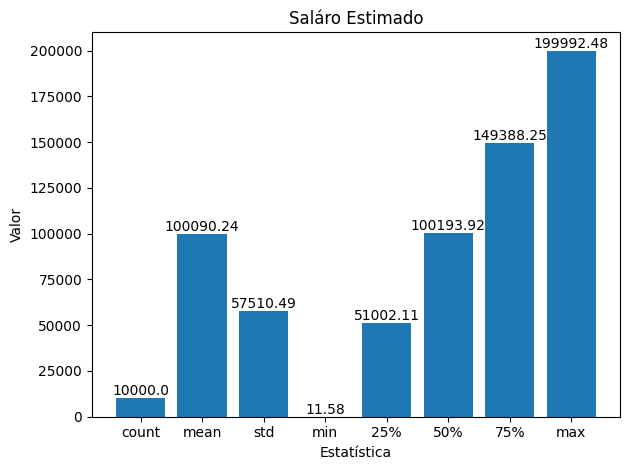

In [ ]:
descricao_saldo = round(df['estimated_salary'].describe(), 2)

# Preparação dos dados para o gráfico
indices = descricao_saldo.index
valores = descricao_saldo.values

# Ajuste da largura das barras e espaçamento entre as linhas
largura_barra = 0.8

# Plotagem do gráfico de barras
plt.bar(indices, valores, width=largura_barra, alpha=1, align='center')

# Adicionar os valores exatos acima das colunas
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Estatística')
plt.ylabel('Valor')
plt.title('Saláro Estimado')
plt.grid(False)

# Ajuste do espaçamento entre as barras
plt.tight_layout()

# Exibição do gráfico
plt.show()


## **Balance**

In [ ]:
round(df['balance'].describe(),2)

count     10000.00
mean      76485.89
std       62397.41
min           0.00
25%           0.00
50%       97198.54
75%      127644.24
max      250898.09
Name: balance, dtype: float64

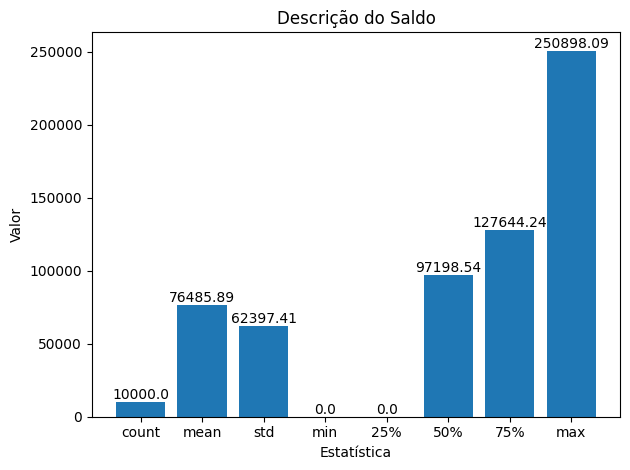

In [ ]:
# Cálculo da descrição do saldo arredondado
descricao_saldo = round(df['balance'].describe(), 2)

# Preparação dos dados para o gráfico
indices = descricao_saldo.index
valores = descricao_saldo.values

# Ajuste da largura das barras e espaçamento entre as linhas
largura_barra = 0.8

# Plotagem do gráfico de barras
plt.bar(indices, valores, width=largura_barra, alpha=1, align='center')

# Adicionar os valores exatos acima das colunas
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Estatística')
plt.ylabel('Valor')
plt.title('Descrição do Saldo')
plt.grid(False)

# Ajuste do espaçamento entre as barras
plt.tight_layout()

# Exibição do gráfico
plt.show()


## **Products Number**

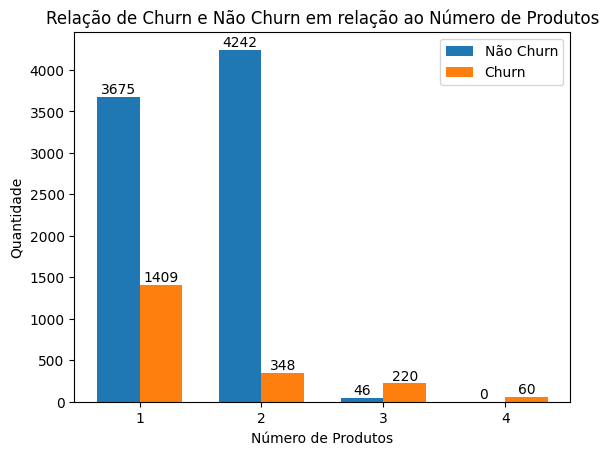

In [ ]:
dados_nao_churn = df[df['churn'] == 0]
dados_churn = df[df['churn'] == 1]
contagem_nao_churn = dados_nao_churn['products_number'].value_counts()
contagem_churn = dados_churn['products_number'].value_counts()
contagem_nao_churn = contagem_nao_churn.sort_index()
contagem_churn = contagem_churn.sort_index()

todos_produtos = set(contagem_nao_churn.index) | set(contagem_churn.index)
posicoes = np.arange(len(todos_produtos))

largura = 0.35  # Largura das barras

contagem_nao_churn = contagem_nao_churn.reindex(todos_produtos, fill_value=0)
contagem_churn = contagem_churn.reindex(todos_produtos, fill_value=0)

plt.bar(posicoes, contagem_nao_churn, largura, label='Não Churn')
plt.bar(posicoes + largura, contagem_churn, largura, label='Churn')

# Adicionando os valores em cima das barras
for i, v in enumerate(contagem_nao_churn):
    plt.text(posicoes[i], v + 5, str(v), ha='center', va='bottom')

for i, v in enumerate(contagem_churn):
    plt.text(posicoes[i] + largura, v + 5, str(v), ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Número de Produtos')
plt.ylabel('Quantidade')
plt.title('Relação de Churn e Não Churn em relação ao Número de Produtos')
plt.legend()

# Ajustando os rótulos do eixo x
plt.xticks(posicoes + largura / 2, todos_produtos)

# Exibir o gráfico
plt.show()


In [ ]:
contagem_churn_por_produto = df[df['churn'] == 1].groupby('products_number').size()

print(contagem_churn_por_produto)

products_number
1    1409
2     348
3     220
4      60
dtype: int64


## **Gender**

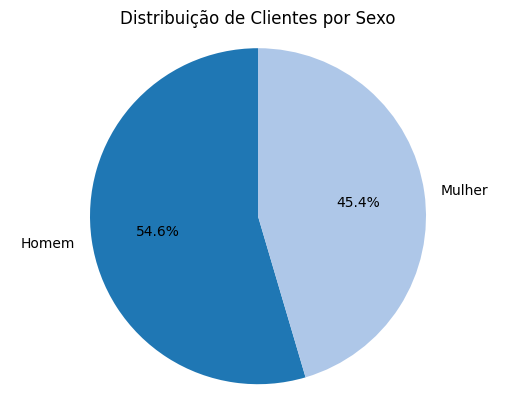

In [ ]:
labels = ['Homem', 'Mulher']
values = df['gender'].value_counts().values
title = 'Distribuição de Clientes por Sexo'

gerarGrafico(labels, values, title)


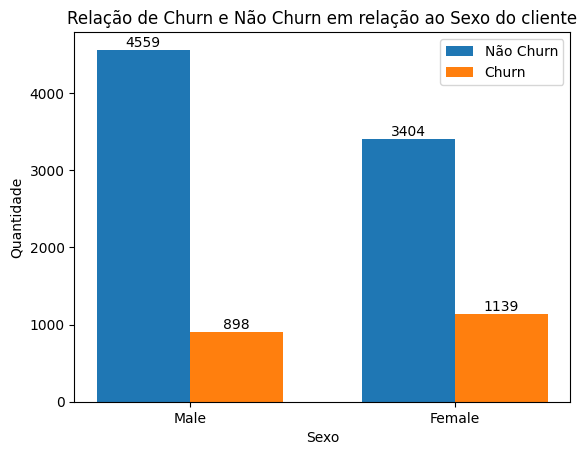

In [ ]:
dados_nao_churn = df[df['churn'] == 0]
dados_churn = df[df['churn'] == 1]
contagem_nao_churn = dados_nao_churn['gender'].value_counts()
contagem_churn = dados_churn['gender'].value_counts()
contagem_nao_churn = contagem_nao_churn.sort_index()
contagem_churn = contagem_churn.sort_index()

todos_produtos = set(contagem_nao_churn.index) | set(contagem_churn.index)
posicoes = np.arange(len(todos_produtos))

largura = 0.35  # Largura das barras

contagem_nao_churn = contagem_nao_churn.reindex(todos_produtos, fill_value=0)
contagem_churn = contagem_churn.reindex(todos_produtos, fill_value=0)

plt.bar(posicoes, contagem_nao_churn, largura, label='Não Churn')
plt.bar(posicoes + largura, contagem_churn, largura, label='Churn')

# Adicionando os valores em cima das barras
for i, v in enumerate(contagem_nao_churn):
    plt.text(posicoes[i], v + 5, str(v), ha='center', va='bottom')

for i, v in enumerate(contagem_churn):
    plt.text(posicoes[i] + largura, v + 5, str(v), ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Relação de Churn e Não Churn em relação ao Sexo do cliente')
plt.legend()

# Ajustando os rótulos do eixo x
plt.xticks(posicoes + largura / 2, todos_produtos)

# Exibir o gráfico
plt.show()


## **Active Member**

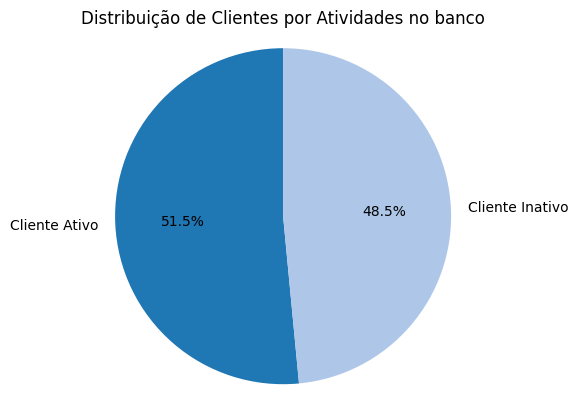

In [ ]:
labels = ['Cliente Ativo', 'Cliente Inativo']
values = df['active_member'].value_counts().values
title = 'Distribuição de Clientes por Atividades no banco'

gerarGrafico(labels, values, title)

## **Tenure**

In [ ]:
round(df['tenure'].describe(),2)

count    10000.00
mean         5.01
std          2.89
min          0.00
25%          3.00
50%          5.00
75%          7.00
max         10.00
Name: tenure, dtype: float64

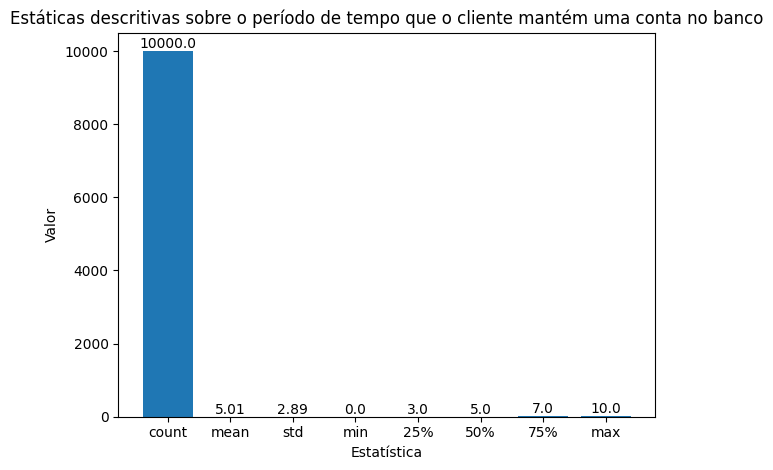

In [ ]:
descricao_saldo = round(df['tenure'].describe(), 2)

# Preparação dos dados para o gráfico
indices = descricao_saldo.index
valores = descricao_saldo.values

# Plotagem do gráfico de barras
plt.bar(indices, valores, width=0.8, alpha=1, align='center')

# Adicionando os valores exatos acima das colunas
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Estatística')
plt.ylabel('Valor')
plt.title('Estáticas descritivas sobre o período de tempo que o cliente mantém uma conta no banco')
plt.grid(False)

# Ajuste do espaçamento entre as barras
plt.tight_layout()

# Exibição do gráfico
plt.show()


## **Churn**

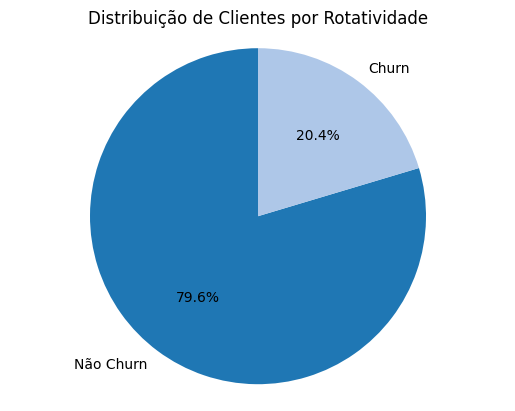

In [ ]:
labels = ['Não Churn', 'Churn']
values = df['churn'].value_counts().values
title = 'Distribuição de Clientes por Rotatividade'

gerarGrafico(labels, values, title)



---



# **ALGORITMOS**

In [ ]:
# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Substituir os valores da coluna 'gender' por valores numéricos
X['gender'] = X['gender'].replace({'Female': 1, 'Male': 0})

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X[['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']])

X_normalized = pd.concat([pd.DataFrame(X_scaled, columns=['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']), X[['gender']]], axis=1)

encoder = OneHotEncoder(sparse=False)
country_encoded = encoder.fit_transform(df[['country']])
country_encoded_df = pd.DataFrame(country_encoded, columns=encoder.categories_[0])

X_normalized = pd.concat([X_normalized, country_encoded_df], axis=1)
print(X_normalized.head())

# Instanciar os modelos de regressão logística e árvore de decisão
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
nb_model = GaussianNB()
forest_model = RandomForestClassifier()

# Definir as métricas a serem avaliadas
scoring = ['accuracy', 'precision', 'recall', 'f1']

   credit_score       age   balance  tenure  products_number  active_member  \
0         0.538  0.324324  0.000000     0.2         0.000000            1.0   
1         0.516  0.310811  0.334031     0.1         0.000000            1.0   
2         0.304  0.324324  0.636357     0.8         0.666667            0.0   
3         0.698  0.283784  0.000000     0.1         0.333333            0.0   
4         1.000  0.337838  0.500246     0.2         0.000000            1.0   

   estimated_salary  gender  France  Germany  Spain  
0          0.506735       1     1.0      0.0    0.0  
1          0.562709       1     0.0      0.0    1.0  
2          0.569654       1     1.0      0.0    0.0  
3          0.469120       1     1.0      0.0    0.0  
4          0.395400       1     0.0      0.0    1.0  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **Regressão logística**

In [ ]:
# Realizar a CV de 10 para a regressão logística
logistic_scores = cross_validate(logistic_model, X_normalized, y, cv=10, scoring=scoring)

# Calcular as médias das métricas para a regressão logística
logistic_accuracy = logistic_scores['test_accuracy'].mean()
logistic_precision = logistic_scores['test_precision'].mean()
logistic_recall = logistic_scores['test_recall'].mean()
logistic_f1 = logistic_scores['test_f1'].mean()

# Imprimir os resultados
print("Regressão Logística:")
print("Acurácia:", logistic_accuracy)
print("Precisão:", logistic_precision)
print("Sensibilidade/Recall:", logistic_recall)
print("Medida F1:", logistic_f1)
print()

Regressão Logística:
Acurácia: 0.8110000000000002
Precisão: 0.611908996600398
Sensibilidade/Recall: 0.20376460929199264
Medida F1 média: 0.30406387814688307



## **Árvore de decisão**

In [ ]:
tree_scores = cross_validate(tree_model, X_normalized, y, cv=10, scoring=scoring)

# Calcular as médias das métricas para a árvore de decisão
tree_accuracy = tree_scores['test_accuracy'].mean()
tree_precision = tree_scores['test_precision'].mean()
tree_recall = tree_scores['test_recall'].mean()
tree_f1 = tree_scores['test_f1'].mean()

print("Árvore de Decisão:")
print("Acurácia:", tree_accuracy)
print("Precisão:", tree_precision)
print("Sensibilidade/Recall:", tree_recall)
print("Medida F1:", tree_f1)
print()


Árvore de Decisão:
Acurácia: 0.7938000000000001
Precisão: 0.4931243401625534
Sensibilidade/Recall: 0.502694871051869
Medida F1: 0.49734877969114316



## **Naive Bayes**

In [ ]:
nb_scores = cross_validate(nb_model, X_normalized, y, cv=10, scoring=scoring)

# Calcular as médias das métricas para o Naive Bayes
nb_accuracy = nb_scores['test_accuracy'].mean()
nb_precision = nb_scores['test_precision'].mean()
nb_recall = nb_scores['test_recall'].mean()
nb_f1 = nb_scores['test_f1'].mean()

print("Naive Bayes:")
print("Acurácia:", nb_accuracy)
print("Precisão:", nb_precision)
print("Sensibilidade/Recall:", nb_recall)
print("Medida F1:", nb_f1)
print()

Naive Bayes:
Acurácia: 0.8187999999999999
Precisão: 0.5894219763589692
Sensibilidade/Recall: 0.3711436298657394
Medida F1: 0.45458558614065475



## **Random Forest**

In [ ]:
forest_scores = cross_validate(forest_model, X_normalized, y, cv=10, scoring=scoring)

forest_accuracy = forest_scores['test_accuracy'].mean()
forest_precision = forest_scores['test_precision'].mean()
forest_recall = forest_scores['test_recall'].mean()
forest_f1 = forest_scores['test_f1'].mean()

print("Random Forest:")
print("Acurácia:", forest_accuracy)
print("Precisão:", forest_precision)
print("Sensibilidade/Recall:", forest_recall)
print("Medida F1:", forest_f1)

Random Forest:
Acurácia: 0.8622
Precisão: 0.7619791311266025
Sensibilidade/Recall: 0.4717738819665798
Medida F1: 0.5818567061000353


### **Oráculo**

In [ ]:
forest_model.fit(X_normalized, y)

# Exemplo a ser classificado
example = pd.DataFrame({
    'gender': ['Female'],
    'country': ['France'],
    'credit_score': [600],
    'age': [45],
    'tenure': [7],
    'balance': [10000],
    'products_number': [3],
    'credit_card': [1],
    'active_member': [0],
    'estimated_salary': [60000]
})

# Substituir os valores da coluna 'gender' por valores numéricos
example['gender'] = example['gender'].replace({'Female': 1, 'Male': 0})

# Normalizar o exemplo
example_scaled = scaler.transform(example[['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']])
example_normalized = pd.concat([pd.DataFrame(example_scaled, columns=['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']), example[['gender']]], axis=1)

# Adicionar as colunas de país codificadas ao exemplo
example_encoded = encoder.transform(example[['country']])
example_encoded_df = pd.DataFrame(example_encoded, columns=encoder.categories_[0])
example_normalized = pd.concat([example_normalized, example_encoded_df], axis=1)

# Reordenar as colunas para que estejam na mesma ordem do conjunto de treinamento
example_normalized = example_normalized[X_normalized.columns]

# Fazer a previsão
prediction = forest_model.predict(example_normalized)

# Exibir a classificação
print("Classificação:", prediction)


Classificação: [1]


## **Light Gradient Boosting Machine**

é baseado em árvores de decisão e utiliza o método de boosting para melhorar o desempenho de modelos de classificação e regressão.

**Parâmetros:**
* **objective**: Especifica a função objetivo a ser otimizada durante o treinamento
do modelo. O valor 'binary' indica que o modelo está sendo treinado para um problema de classificação binária.
* **metric**: Define a métrica a ser usada para avaliar o desempenho do modelo durante o treinamento. No código, 'binary_logloss' é usado, que calcula a perda logarítmica binária.
* **boosting_type**: Especifica o tipo de boosting a ser usado. O valor 'gbdt' indica Gradient Boosting Decision Tree, que é o tipo padrão no LightGBM.
* **num_leaves**: Controla o número máximo de folhas em cada árvore. Um valor maior permite que as árvores tenham mais complexidade, mas também pode levar a um maior risco de overfitting.
* **learning_rate**: Determina a taxa de aprendizado do algoritmo, ou seja, o quanto cada árvore contribui para a atualização do modelo. Um valor menor reduz a contribuição de cada árvore, tornando o treinamento mais lento, mas potencialmente melhorando a generalização.
* **force_row_wise**: Controla a forma como os dados são armazenados e acessados pelo modelo.
* **verbose**: Controla o nível de detalhes das mensagens de progresso e informações exibidas durante o treinamento.

Outros parâmetros apresentados pelo modelo: num_iterations, max_depth, min_data_in_leaf, feature_fraction, bagging_fraction, lambda, min_gain_to_split.

In [ ]:
# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Substituir os valores da coluna 'gender' por valores numéricos
X['gender'] = X['gender'].replace({'Female': 1, 'Male': 0})

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X[['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']])

X_normalized = pd.concat([pd.DataFrame(X_scaled, columns=['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']), X[['gender']]], axis=1)

encoder = OneHotEncoder(sparse=False)
country_encoded = encoder.fit_transform(df[['country']])
country_encoded_df = pd.DataFrame(country_encoded, columns=encoder.categories_[0])

X_normalized = pd.concat([X_normalized, country_encoded_df], axis=1)

# Definir os parâmetros do modelo LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'force_row_wise':True,
    'verbose': 0
}

# Criar o modelo LightGBM
lgbm_model = lgb.LGBMClassifier(**params)

scoring = ['accuracy', 'precision', 'recall', 'f1']

lgbm_scores = cross_validate(lgbm_model, X_normalized, y, cv=10, scoring=scoring)

lgbm_accuracy = lgbm_scores['test_accuracy'].mean()
lgbm_precision = lgbm_scores['test_precision'].mean()
lgbm_recall = lgbm_scores['test_recall'].mean()
lgbm_f1 = lgbm_scores['test_f1'].mean()

# Imprimir os resultados médios da validação cruzada
print("LightGBM:")
print("Acurácia:", lgbm_accuracy)
print("Precisão:", lgbm_precision)
print("Recall:", lgbm_recall)
print("F1:", lgbm_f1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LightGBM:
Acurácia: 0.8642999999999998
Precisão: 0.7603043038379489
Recall: 0.4889476480247271
F1: 0.5940449903703542


### **Oráculo**

In [ ]:
lgbm_model.fit(X_normalized, y)

# Exemplo a ser classificado
example = pd.DataFrame({
    'gender': ['Female'],
    'country': ['France'],
    'credit_score': [600],
    'age': [45],
    'tenure': [7],
    'balance': [10000],
    'products_number': [3],
    'credit_card': [1],
    'active_member': [0],
    'estimated_salary': [60000]
})

# Substituir os valores da coluna 'gender' por valores numéricos
example['gender'] = example['gender'].replace({'Female': 1, 'Male': 0})

# Normalizar o exemplo
example_scaled = scaler.transform(example[['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']])
example_normalized = pd.concat([pd.DataFrame(example_scaled, columns=['credit_score', 'age', 'balance', 'tenure', 'products_number', 'active_member', 'estimated_salary']), example[['gender']]], axis=1)

# Adicionar as colunas de país codificadas ao exemplo
example_encoded = encoder.transform(example[['country']])
example_encoded_df = pd.DataFrame(example_encoded, columns=encoder.categories_[0])
example_normalized = pd.concat([example_normalized, example_encoded_df], axis=1)

# Reordenar as colunas para que estejam na mesma ordem do conjunto de treinamento
example_normalized = example_normalized[X_normalized.columns]

# Fazer a previsão
prediction = lgbm_model.predict(example_normalized)

# Exibir a classificação
print("Classificação:", prediction)


Classificação: [1]
